In [6]:
import pofah.jet_sample as js
import pofah.util.sample_factory as sf
import pofah.util.experiment as ex
import selection.discriminator as dis
import selection.loss_strategy as ls
import analysis.analysis_discriminator as an
import anpofah.util.plotting_util as pu
from importlib import reload

IndentationError: unindent does not match any outer indentation level (analysis_discriminator.py, line 31)

In [2]:
# read in qcd signal region sample
run_n = 101
qcd_sig_id = 'qcdSigReco'
mjj_key = 'mJJ'

In [3]:
experiment = ex.Experiment(run_n)
qcd_sig_data = sf.read_results_to_jet_sample_dict([qcd_sig_id], experiment)

split into discriminator train and test-set

In [4]:
# define quantile and loss-strategy for discimination
quantile = 0.05 # 5%
strategy = ls.combine_loss_min
qcd_sig_sample = qcd_sig_data['qcdSigReco']

In [5]:
print(qcd_sig_sample.features())
# train discriminator (and plot results => TODO)
discriminator = dis.QRDiscriminator(quantile=quantile, loss_strategy=strategy)
discriminator.fit(qcd_sig_sample)

['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dens

In [6]:
# apply selection to datasample
qcd_sig_train_selection = discriminator.select(qcd_sig_sample)
#qcd_sig_test_selected = discriminator.apply(qcd_sig_test)
qcd_sig_sample.add_feature('sel', qcd_sig_train_selection)

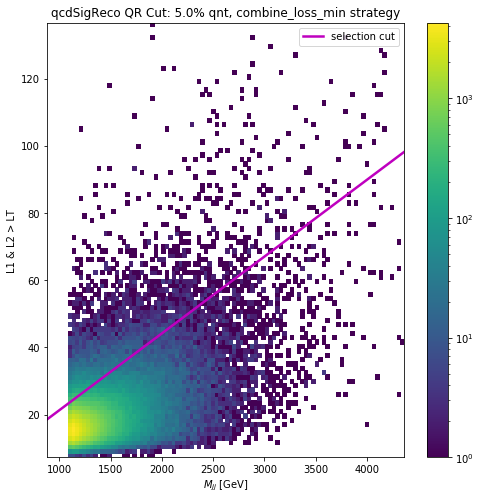

In [7]:
# plot mjj qcd sig to check for flat ratio
an.analyze_discriminator_cut(discriminator, qcd_sig_sample)

plot mjj accepted vs rejected signal to check for mass sculpting

/eos/home-k/kiwoznia/dev/analysis_physics_objects/anpofah/util/plotting_util.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  counts, edges, _ = ax.hist(data, bins=bins, normed=normed, histtype='step', label=legend)


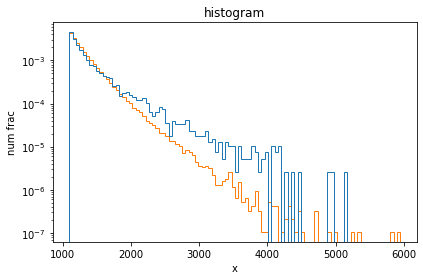

In [8]:
pu.plot_hist([qcd_sig_sample.accepted(mjj_key), qcd_sig_sample.rejected(mjj_key)])

do statistical analysis

In [83]:
import dadrah.analysis.analysis_discriminator as ad
from importlib import reload
reload(ad)

<module 'dadrah.analysis.analysis_discriminator' from '/eos/home-k/kiwoznia/dev/data_driven_anomaly_hunting/dadrah/analysis/analysis_discriminator.py'>